### **Introduction**
This project explores UFC fighter and event data to identify key patterns in performance. By analyzing metrics such as striking accuracy, takedown efficeny and submissions, we aim to better understand what leads to success in octagon.


### **Objective**

Analyze UFC fighter performance metrics to uncover trends, evaluate factors influencing outcomes and providing insights into fighter performance across different weight class, fighting styles and events. By doing this data analysis, we aim to explore relationships between key metrics such as strikig accuracy, takedown efficency and submission rates and their impact on match results. 

In [176]:
# imported python libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [177]:
# Loading the files
fighter_stats_path = r"../Datasets/fighter_stats.csv"
medium_dataset_path = r"../Datasets/medium_dataset.csv"
# Reading files
fighter_data = pd.read_csv(fighter_stats_path)
event_detail_data = pd.read_csv(medium_dataset_path)


In [178]:
#shape of fighter data
fs = fighter_data.shape
print("Fighter data")
print("Rows: ",fs[0])
print("Columns: ",fs[1])

Fighter data
Rows:  2479
Columns:  16


In [179]:
#shape of event detail data
es = event_detail_data.shape
print("Event detail data")
print("Rows: ", es[0])
print("Columns: ", es[1])

Event detail data
Rows:  7582
Columns:  19


In [180]:
# showing top 5 rows of fighter_data
fighter_data.head()

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


In [181]:
#showing top 5 rows of event_details_data
event_detail_data.head()

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,Women's Flyweight,U-DEC,NaN,5.0,5:00
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,1.0,4:33
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punches,2.0,0:21
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,Featherweight,SUB,Rear Naked Choke,2.0,1:50


In [182]:
#Checking if there is any null values in fighter data
fighter_data.isna().sum()

name             1
wins             1
losses           1
height           1
weight           1
reach          656
stance          78
age            161
SLpM             1
sig_str_acc      1
SApM             1
str_def          1
td_avg           1
td_acc           1
td_def           1
sub_avg          1
dtype: int64

In [183]:
#Changing the fighter_data to Dataframe
fighter_data_df= pd.DataFrame(fighter_data)

#Deleting the row where name is missing
fighter_data_df = fighter_data_df[:2478]
fighter_data_df

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,Frank Hamaker,1.0,0.0,187.96,111.13,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [184]:
fighter_data_df.isna().sum()

name             0
wins             0
losses           0
height           0
weight           0
reach          655
stance          77
age            160
SLpM             0
sig_str_acc      0
SApM             0
str_def          0
td_avg           0
td_acc           0
td_def           0
sub_avg          0
dtype: int64

In [185]:
# Finding out the percentage of empty data
empty_reach_percent = round(fighter_data_df['reach'].isna().sum()/fs[0]*100)
print('Percentage of empty data "Reach" field')
print(empty_reach_percent)

empty_stance_percent = round(fighter_data_df['stance'].isna().sum()/fs[0]*100)
print('Percentage of empty data "Stance" field')
print(empty_stance_percent)

empty_age_percent = round(fighter_data_df['age'].isna().sum()/fs[0]*100)
print('Percentage of empty data "Age" field')
print(empty_age_percent)

Percentage of empty data "Reach" field
26
Percentage of empty data "Stance" field
3
Percentage of empty data "Age" field
6


In [186]:
# Since more than 20 percent of data is missing in reach field, so deleting this column would be best choice
fighter_data_df = fighter_data_df.drop(columns='reach')
fighter_data_df


,name,wins,losses,height,weight,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,Frank Hamaker,1.0,0.0,187.96,111.13,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


<Axes: xlabel='age'>

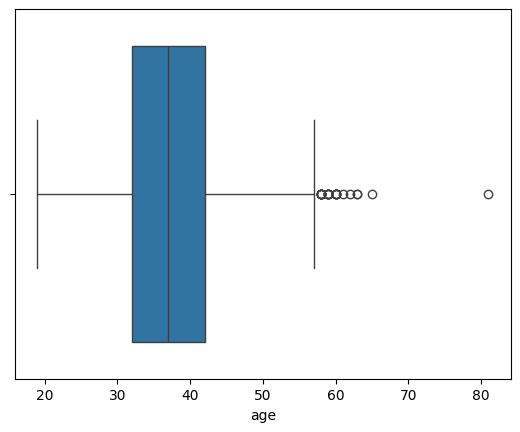

In [187]:
# Checking for outliers in 'age'
sns.boxplot(x=fighter_data_df['age'])

In [202]:
fighter_data_df['age'].fillna(fighter_data_df['age'].median,inplace=True)

In [203]:
mod_stance = fighter_data_df['stance'].mode()[0]
fighter_data_df['stance'].fillna(mod_stance,inplace=True)
fighter_data_df.isnull().sum()

name           0
wins           0
losses         0
height         0
weight         0
stance         0
age            0
SLpM           0
sig_str_acc    0
SApM           0
str_def        0
td_avg         0
td_acc         0
td_def         0
sub_avg        0
dtype: int64

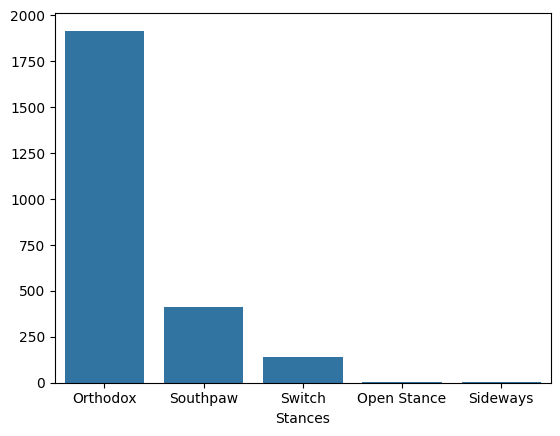

In [218]:
unique_stance = fighter_data_df['stance'].value_counts().index
count_stance = fighter_data_df['stance'].value_counts().values
sns.barplot(x=unique_stance,y=count_stance)
plt.xlabel("Stances")
plt.show()